In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import BasicAer
from qiskit.aqua.algorithms import VQE
from qiskit.aqua.components.variational_forms import RYRZ
from qiskit.aqua.components.optimizers import SLSQP, COBYLA
from qiskit.chemistry.core import Hamiltonian
from qiskit.chemistry.drivers import PySCFDriver

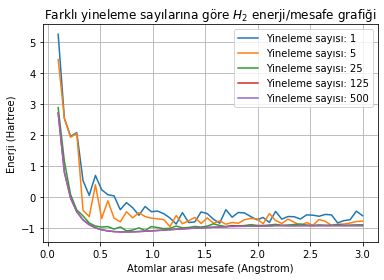

CPU times: user 6min 41s, sys: 40.9 s, total: 7min 22s
Wall time: 10min


In [2]:
%%time
iterations = [1, 5, 25, 125, 500]
distances = np.linspace(0.1, 3.0, 50)
for iteration in iterations:
    energy = []
    for distance in distances:
        backend = BasicAer.get_backend("statevector_simulator")
        driver = PySCFDriver(atom="H .0 .0 .0; H .0 .0 " + str(distance))
        molecule = driver.run()
        operator =  Hamiltonian()
        qubit_op = operator.run(molecule)[0]
        var_form = RYRZ(qubit_op.num_qubits)
        optimizer = COBYLA(maxiter=iteration)
        vqe = VQE(qubit_op, var_form, optimizer)
        result = vqe.run(backend)
        lines, result = operator.process_algorithm_result(result)
        energy.append(result['energy'])
    plt.plot(distances, energy, label="Yineleme sayısı: {}".format(iteration))
plt.title(r"Farklı yineleme sayılarına göre $H_{2}$ enerji/mesafe grafiği")
plt.xlabel("Atomlar arası mesafe (Angstrom)")
plt.ylabel("Enerji (Hartree)")
plt.grid()
plt.legend()
plt.show()

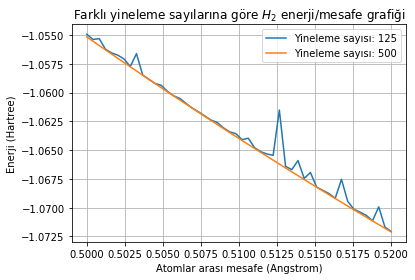

CPU times: user 4min 5s, sys: 18.8 s, total: 4min 23s
Wall time: 7min


In [3]:
%%time
iterations = [125, 500]
distances = np.linspace(0.5, 0.52, 50)
for iteration in iterations:
    energy = []
    for distance in distances:
        backend = BasicAer.get_backend("statevector_simulator")
        driver = PySCFDriver(atom="H .0 .0 .0; H .0 .0 " + str(distance))
        molecule = driver.run()
        operator =  Hamiltonian()
        qubit_op = operator.run(molecule)[0]
        var_form = RYRZ(qubit_op.num_qubits)
        optimizer = COBYLA(maxiter=iteration)
        vqe = VQE(qubit_op, var_form, optimizer)
        result = vqe.run(backend)
        lines, result = operator.process_algorithm_result(result)
        energy.append(result['energy'])
    plt.plot(distances, energy, label="Yineleme sayısı: {}".format(iteration))
plt.title(r"Farklı yineleme sayılarına göre $H_{2}$ enerji/mesafe grafiği")
plt.xlabel("Atomlar arası mesafe (Angstrom)")
plt.ylabel("Enerji (Hartree)")
plt.grid()
plt.legend()
plt.show()

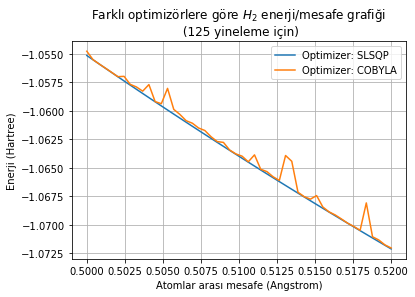

CPU times: user 3min 24s, sys: 18.7 s, total: 3min 43s
Wall time: 5min 53s


In [4]:
%%time
distances = np.linspace(0.5, 0.52, 50)
optimizers = ["SLSQP", "COBYLA"]
for optimizer in optimizers:
    energy = []
    for distance in distances:
        backend = BasicAer.get_backend("statevector_simulator")
        driver = PySCFDriver(atom="H .0 .0 .0; H .0 .0 " + str(distance))
        molecule = driver.run()
        operator =  Hamiltonian()
        qubit_op = operator.run(molecule)[0]
        var_form = RYRZ(qubit_op.num_qubits)
        vqe_optimizer = eval(optimizer)(maxiter=125)
        vqe = VQE(qubit_op, var_form, vqe_optimizer)
        result = vqe.run(backend)
        lines, result = operator.process_algorithm_result(result)
        energy.append(result['energy'])
    plt.plot(distances, energy, label="Optimizer: {}".format(optimizer))
plt.title('Farklı optimizörlere göre $H_{2}$ enerji/mesafe grafiği \n (125 yineleme için)')
plt.xlabel("Atomlar arası mesafe (Angstrom)")
plt.ylabel("Enerji (Hartree)")
plt.grid()
plt.legend()
plt.show()